In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
def generate_gauss(mu):
    ones = np.random.normal(mu, 1, (500, 2))
    zeros = np.random.normal(0, 1, (500, 2))
    df_ones = pd.DataFrame(ones, columns=["x", "y"])
    df_zeros = pd.DataFrame(zeros, columns=["x", "y"])
    df_ones["label"] = 1
    df_zeros["label"] = 0
    df = pd.concat([df_ones, df_zeros])
    return df

In [17]:
def generate_ring(noise):
    angle_small = np.random.uniform(0, 2 * np.pi, 500)
    angle_big = np.random.uniform(0, 2 * np.pi, 500)
    radius_small = 1 + np.random.normal(0, noise, 500)
    radius_big = 4 + np.random.normal(0, noise, 500)
    x_small = radius_small * np.cos(angle_small)
    y_small = radius_small * np.sin(angle_small)
    x_big = radius_big * np.cos(angle_big)
    y_big = radius_big * np.sin(angle_big)
    df_small = pd.DataFrame({"x": x_small, "y": y_small, "label": 0})
    df_big = pd.DataFrame({"x": x_big, "y": y_big, "label": 1})
    return pd.concat([df_small, df_big])

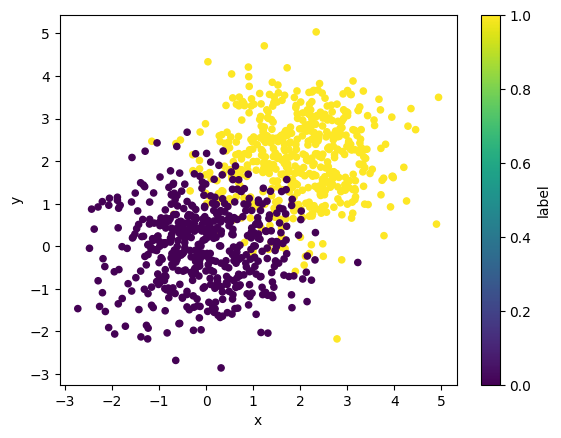

In [23]:
df = generate_gauss(2)
plot = df.plot.scatter(x="x", y="y", c="label", colormap="viridis")

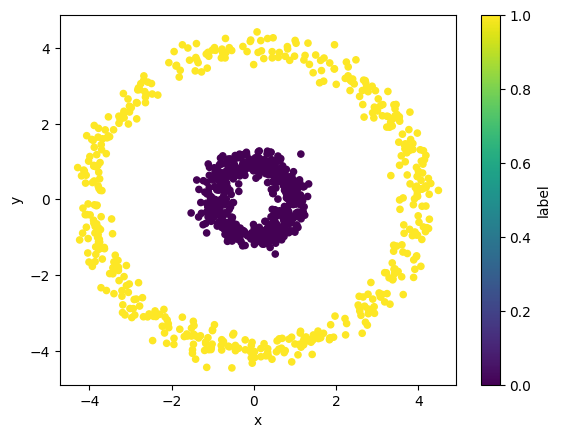

In [21]:
df = generate_ring(0.2)
plot = df.plot.scatter(x="x", y="y", c="label", colormap="viridis")

# test svm



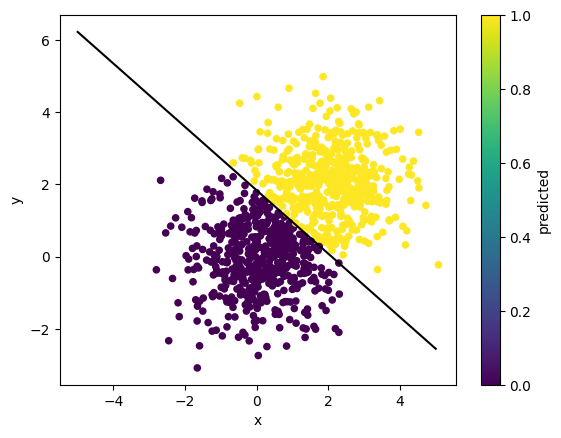

In [41]:
from sklearn.svm import SVC

df = generate_gauss(2)
X = df[["x", "y"]]
y = df["label"]
clf = SVC(kernel="linear")
clf.fit(X, y)

df["predicted"] = clf.predict(X)
plot = df.plot.scatter(x="x", y="y", c="predicted", colormap="viridis")

w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]

plt.plot(xx, yy, "k-")

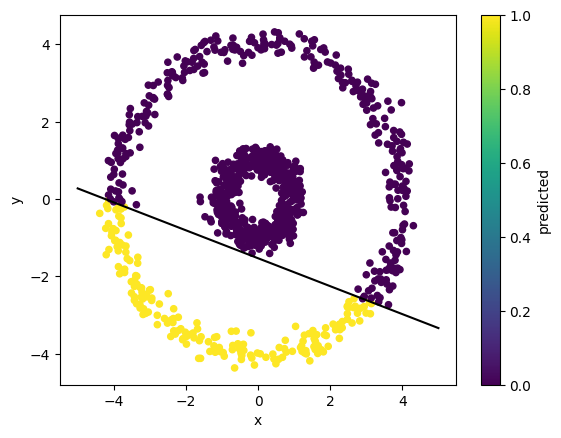

In [42]:
df = generate_ring(0.2)
X = df[["x", "y"]]
y = df["label"]
clf = SVC(kernel="linear")
clf.fit(X, y)

df["predicted"] = clf.predict(X)

df.plot.scatter(x="x", y="y", c="predicted", colormap="viridis")
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]

plt.plot(xx, yy, "k-")

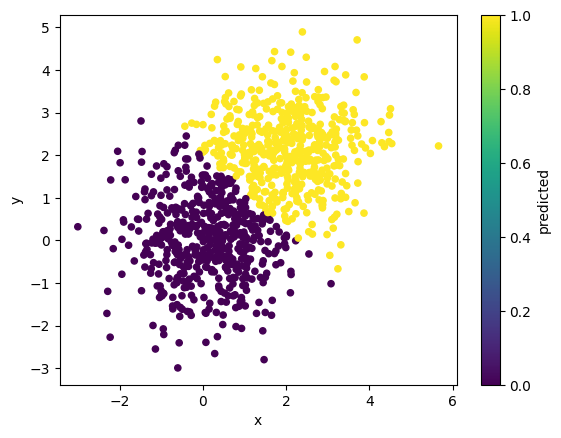

In [44]:
from sklearn.svm import SVC

df = generate_gauss(2)
X = df[["x", "y"]]
y = df["label"]
clf = SVC(kernel="rbf")
clf.fit(X, y)

df["predicted"] = clf.predict(X)
plot = df.plot.scatter(x="x", y="y", c="predicted", colormap="viridis")

<Axes: xlabel='x', ylabel='y'>

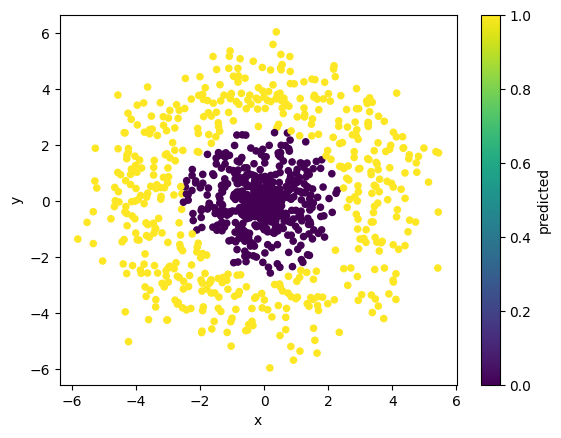

In [49]:
df = generate_ring(0.9)
X = df[["x", "y"]]
y = df["label"]
clf = SVC(kernel="rbf")
clf.fit(X, y)

df["predicted"] = clf.predict(X)

df.plot.scatter(x="x", y="y", c="predicted", colormap="viridis")

<Axes: xlabel='x', ylabel='y'>

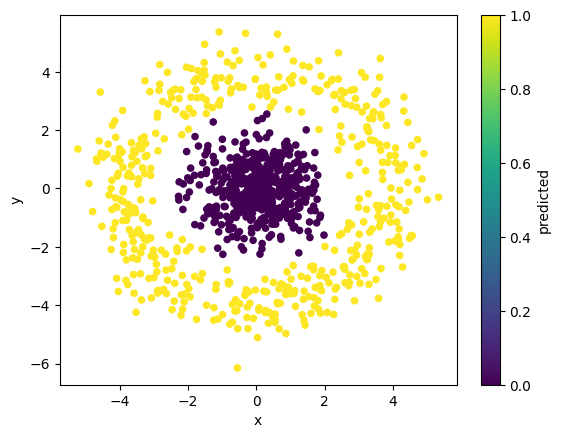

In [52]:
df = generate_ring(0.6)
X = df[["x", "y"]]
y = df["label"]
clf = SVC(kernel="poly", degree=2)
clf.fit(X, y)

df["predicted"] = clf.predict(X)

df.plot.scatter(x="x", y="y", c="predicted", colormap="viridis")

In [60]:
def generate_xor(var):
    ones = np.random.normal((10, -10), var, (500, 2))
    zeros = np.random.normal((10, 10), var, (500, 2))
    ones_v2 = np.random.normal((-10, 10), var, (500, 2))
    zeros_v2 = np.random.normal((-10, -10), var, (500, 2))
    ones = np.concatenate([ones, ones_v2])
    zeros = np.concatenate([zeros, zeros_v2])
    df_ones = pd.DataFrame(ones, columns=["x", "y"])
    df_zeros = pd.DataFrame(zeros, columns=["x", "y"])
    df_ones["label"] = 1
    df_zeros["label"] = 0
    df = pd.concat([df_ones, df_zeros])
    return df

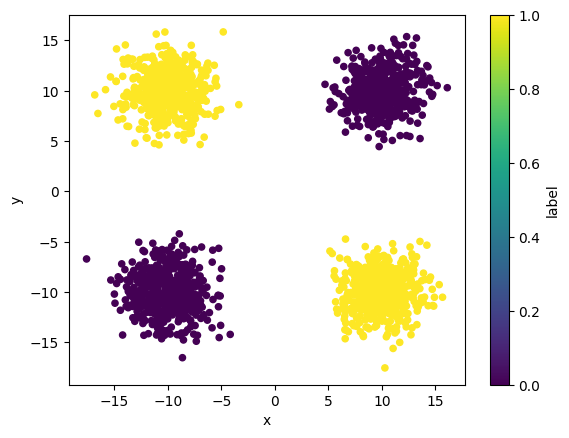

In [61]:
df = generate_xor(2)
plot = df.plot.scatter(x="x", y="y", c="label", colormap="viridis")

<Axes: xlabel='x', ylabel='y'>

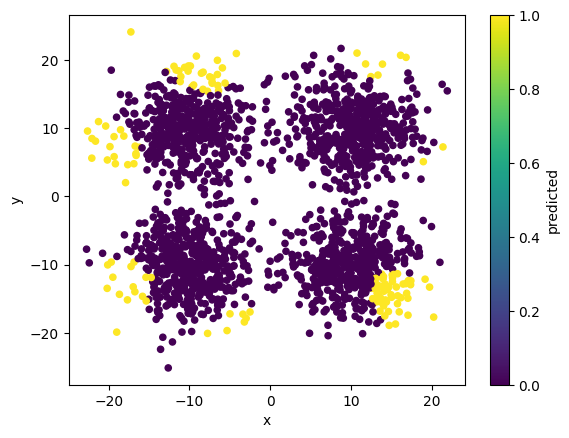

In [78]:
df = generate_xor(4)
X = df[["x", "y"]]
y = df["label"]
clf = SVC(kernel="poly", degree=7)
clf.fit(X, y)

df["predicted"] = clf.predict(X)

df.plot.scatter(x="x", y="y", c="predicted", colormap="viridis")

<Axes: xlabel='x', ylabel='y'>

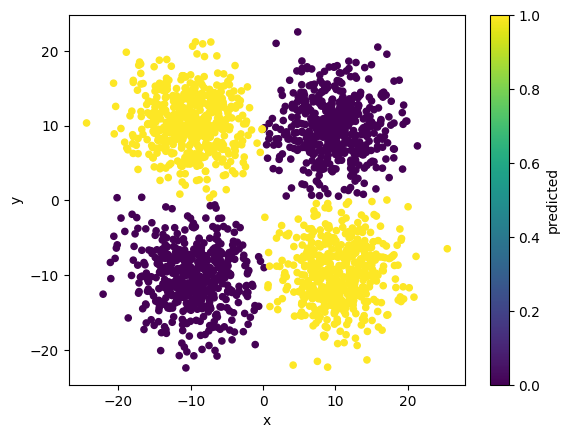

In [67]:
df = generate_xor(4)
X = df[["x", "y"]]
y = df["label"]
clf = SVC(kernel="rbf")
clf.fit(X, y)

df["predicted"] = clf.predict(X)

df.plot.scatter(x="x", y="y", c="predicted", colormap="viridis")

<Axes: xlabel='x', ylabel='y'>

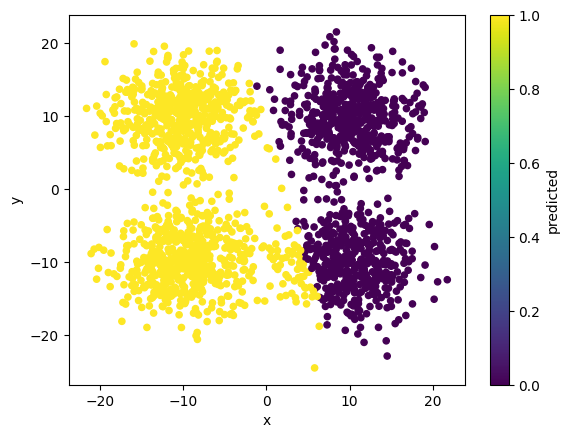

In [79]:
df = generate_xor(4)
X = df[["x", "y"]]
y = df["label"]
clf = SVC(kernel="linear")
clf.fit(X, y)

df["predicted"] = clf.predict(X)

df.plot.scatter(x="x", y="y", c="predicted", colormap="viridis")